# <span style="color:darkblue"> Lecture 24 - Text Data  </span>

<font size = "5">

In  this lecture we will work with text data

- Basic summary and data manipulation
- Generate word clouds!

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Installation

In [316]:
# If you're using base Python, open the terminal and type
#   pip3 install wordcloud

# If you're using Anaconda, open the termianl and type
#   conda install -c https://conda.anaconda.org/conda-forge wordcloud
# Note: You will get a prompt for whether you want to continue. Type yes:
#    y 
# Note: this is another way to install packages, especially custom ones that
# are not included in the standard Anaconda libraries.

<font size = "5">

Import Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from wordcloud import WordCloud, STOPWORDS

<font size = "5">

Import Data

- Congressional bills in the United States

In [2]:
bills_actions = pd.read_csv("data_raw/bills_actions.csv")
bills_actions.dtypes

Congress        int64
bill_number     int64
bill_type      object
action         object
main_action    object
category       object
member_id       int64
dtype: object

# <span style="color:darkblue"> II. Basic Text Operations </span>

<font size = "5">

Count Frequency

In [3]:
bills_actions["category"].value_counts()

amendment                       1529
house bill                       902
senate bill                      514
house resolution                 234
senate resolution                 60
house joint resolution            22
house concurrent resolution       20
senate concurrent resolution      14
senate joint resolution            8
Name: category, dtype: int64

<font size = "5">

Subset text categories

In [4]:
# For this analysis we are only interested in bills. With ".query()" ...
#     - We select all entries in the column called "category" 
#       which have values contain in "list_categories"
#     - "in" is used to test whether a word belongs to a list
#     - @ is the syntax to reference "global" variables that
#       are defined in the global environment

list_categories = ["house bill", "senate bill"]
bills           = bills_actions.query('category in @list_categories')

# Verify that the code worked:
bills["category"].value_counts()

house bill     902
senate bill    514
Name: category, dtype: int64

<font size = "5">

Data manipulation with sentences

In [5]:
# How many bills mention the word Senator?
bool_contains = bills["action"].str.contains("Senator")
print(bool_contains.mean())

# How to replace the word "Senator" with "Custom Title"
bills["action"].str.replace("Senator", "Custom Title")

0.3199152542372881


3       Committee on Health, Education, Labor, and Pen...
4       Committee on the Judiciary. Reported by Custom...
5       Committee on the Judiciary. Reported by Custom...
6       Committee on Commerce, Science, and Transporta...
7       Committee on Veterans' Affairs. Reported by Cu...
                              ...                        
3262    Mr. Blumenauer moved to suspend the rules and ...
3263    At the conclusion of debate, the chair put the...
3264    Ms. Hill (CA) moved to suspend the rules and p...
3265    Mr. Barr moved to recommit with instructions t...
3280           Mr. Pallone moved that the Committee rise.
Name: action, Length: 1416, dtype: object

<font size = "5">

Try it yourself!

- Obtain a new dataset called "resolutions" <br>
 which subsets rows contain the "category" values:

 ``` ["house resolution","senate resolution"] ```

In [6]:
# Write your own code

list_resolution = ["house resolution", "senate resolution"]

resolutions = bills_actions.query('category in @list_resolution')

resolutions["category"].value_counts()

house resolution     234
senate resolution     60
Name: category, dtype: int64

# <span style="color:darkblue"> II. Word Clouds from Single Strings  </span>

<font size = "5">

Word Cloud from sentence

(-0.5, 399.5, 199.5, -0.5)

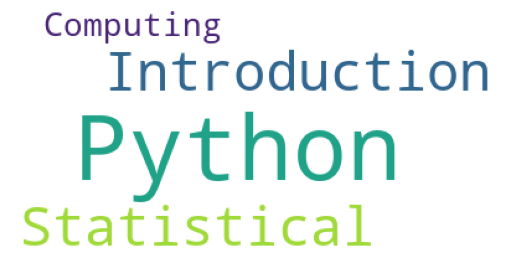

In [16]:
# We start by generating a string with text
# The WordCloud() command generates and object. To display it use "plt.imgshow()"
# Words with higher frequency will tend to appear larger (see advanced options)
# at the end for how to adjust the relative scaling

text = "Introduction to Statistical Computing Python Python Python Python Python"
word_cloud = WordCloud(background_color = "white").generate(text)
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Get word frequencies

In [17]:
word_frequencies = WordCloud().process_text(text)
word_frequencies

{'Introduction': 1, 'Statistical': 1, 'Computing': 1, 'Python': 5}

<font size = "5">

Adding stop words

- WordCloud drops common words like "to, from, the, a, ..."
- They're stored in STOPWORDS. We can add more!

(-0.5, 399.5, 199.5, -0.5)

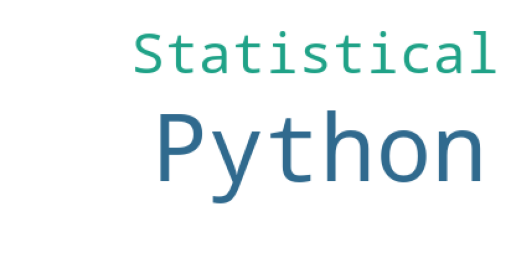

In [325]:
# Create adjusted list of stop words

stop_words = list(STOPWORDS) + ["Introduction", "Computing"]
text = "Introduction to Statistical Computing Python Python Python Python Python"

# Plot results
# If you don't wan't any stopwords, use "stopwords = []" instead
word_cloud = WordCloud(background_color = "white",
                       stopwords = stop_words).generate(text)
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Try it yourself!

- Search in Wikipedia for an article.
- Copy a paragraph into Python and store it as <br>
a string variable called "text".
- Display a word cloud!

(-0.5, 399.5, 199.5, -0.5)

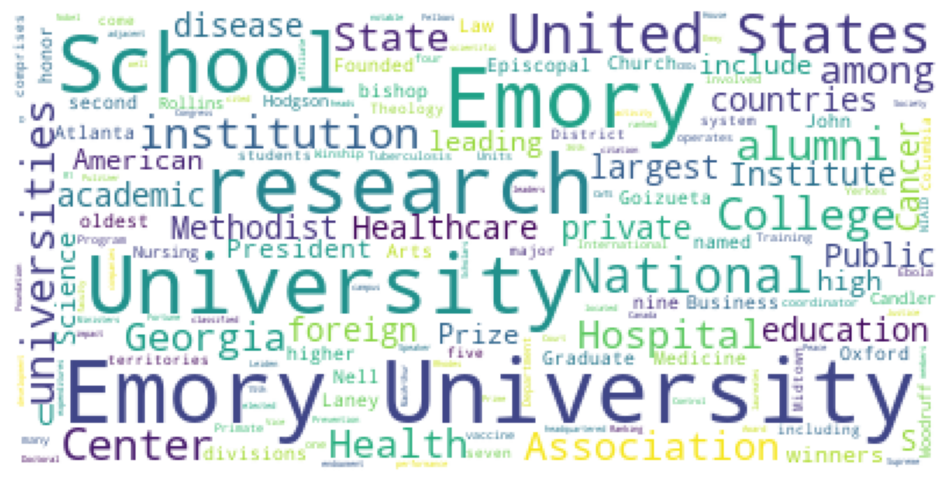

In [24]:
# Write your own code

text = "Emory University is a private research university in Atlanta, Georgia. Founded in 1836 as Emory College by the Methodist Episcopal Church and named in honor of Methodist bishop John Emory, Emory is the second-oldest private institution of higher education in Georgia. Emory University has nine academic divisions: Emory College of Arts and Sciences, Oxford College, Goizueta Business School, Laney Graduate School, School of Law, School of Medicine, Nell Hodgson Woodruff School of Nursing, Rollins School of Public Health, and the Candler School of Theology. Emory University students come from all 50 states, the District of Columbia, five territories of the United States, and over 100 foreign countries. Emory Healthcare is the largest healthcare system in the state of Georgia and comprises seven major hospitals, including Emory University Hospital and Emory University Hospital Midtown. The university operates the Winship Cancer Institute, Yerkes National Primate Research Center, and many disease and vaccine research centers. Emory University is the leading coordinator of the U.S. Health Department's National Ebola Training and Education Center. The university is one of four institutions involved in the NIAID's Tuberculosis Research Units Program. The International Association of National Public Health Institutes is headquartered at the university and the Centers for Disease Control and Prevention and the American Cancer Society are national affiliate institutions located adjacent to the campus. Emory University has the 15th-largest endowment among U.S. colleges and universities. The university is classified among \"R1: Doctoral Universities – Very high research activity\" and is cited for high scientific performance and citation impact in the CWTS Leiden Ranking. The National Science Foundation ranked the university 36th among academic institutions in the United States for research and development (R&D) expenditures. In 1995 Emory University was elected to the Association of American Universities, an association of the 65 leading research universities in the United States and Canada. Emory faculty and alumni include 2 Prime Ministers, 9 university presidents, 11 members of the United States Congress, 2 Nobel Peace Prize laureates, a Vice President of the United States, a United States Speaker of the House, and a United States Supreme Court Justice. Other notable alumni include 21 Rhodes Scholars and 6 Pulitzer Prize winners, as well as Emmy Award winners, MacArthur Fellows, CEOs of Fortune 500 companies, heads of state and other leaders in foreign government. Emory has more than 149,000 alumni, with 75 alumni clubs established worldwide in 20 countries."

word_cloud = WordCloud(background_color = "white").generate(text)

figure(figsize = (12,10))
plt.imshow(word_cloud)
plt.axis("off")

# <span style="color:darkblue"> III. Word Clouds + Pandas </span>

<font size = "5">

Concatanate column into single long sentence

In [25]:
# We start of with an empty string and sequentiall
# concatenate all the elements of bills["main_action"] together

text_bills = "".join(bills["action"])

<font size = "5">

Create WordCloud

(-0.5, 399.5, 199.5, -0.5)

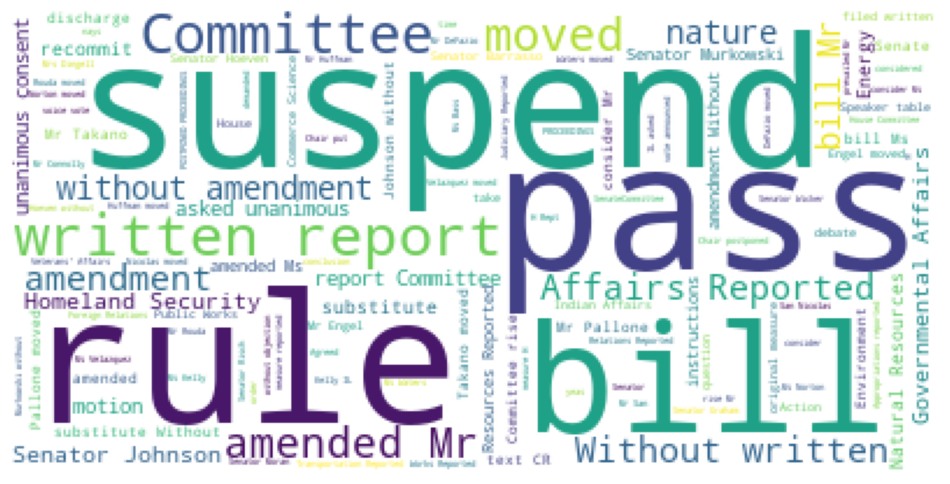

In [26]:
#stopwords = list(STOPWORDS) + ["Introduction","Computing"]
#text = "Introduction to Statistical Computing Python Python Python Python Python"

word_cloud = WordCloud(background_color = "white").generate(text_bills)

figure(figsize = (12,10))            
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Text by subgroup

In [27]:
# Create sets of words by category
subset_bills_house  = bills_actions.query('category == "house bill"')
subset_bills_senate = bills_actions.query('category == "senate bill"')

# Create strings with all the words mentioned for those observations
text_house  = "".join(subset_bills_house["action"])
text_senate = "".join(subset_bills_senate["action"])

<font size = "5" >
Plotting multiple wordclouds

Text(0.5, 1.0, 'Senate')

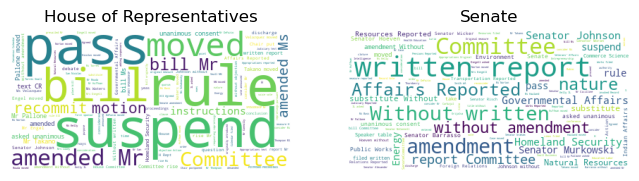

In [28]:
# Use subplots to create figures with multiple plots
fig, list_subfig = plt.subplots(1,2,figsize = [8,3])

word_cloud_house = WordCloud(background_color = "white").generate(text_house)                       
list_subfig[0].imshow(word_cloud_house)
list_subfig[0].axis("off")
list_subfig[0].set_title("House of Representatives")

word_cloud_senate = WordCloud(background_color = "white").generate(text_senate)                       
list_subfig[1].imshow(word_cloud_senate)
list_subfig[1].axis("off")
list_subfig[1].set_title("Senate")

<font size = "5">

**Note:** In general, many possibilities for splitting by subgroups! <br>
Years, geography, type of speaker, type of document, etc.

<font size = "5">
Try it yourself!

- Obtain the text for the categories "house resolution" <br>
and "senate resolution" (separately)
- Plot word clouds for the column "action" for each of the <br>
two categories using ``` plt.subplots()``` and the code <br>
shown above


In [30]:
# Write your own code

subset_resolution_house = resolutions.query('category == "house resolution"')
subset_resolution_senate = resolutions.query('category == "senate resolution"')

text_resolution_house = "".join(subset_resolution_house["action"])
text_resolution_senate = "".join(subset_resolution_senate["action"])

Text(0.5, 1.0, 'Senate')

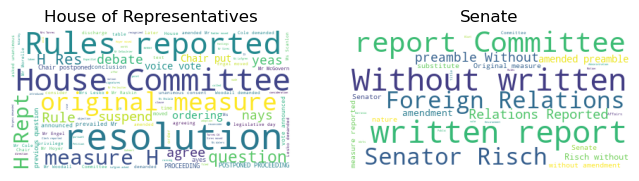

In [31]:
fig, list_subfig = plt.subplots(1,2,figsize = [8,3])

word_cloud_resolution_house = WordCloud(background_color = "white").generate(text_resolution_house)                       
list_subfig[0].imshow(word_cloud_resolution_house)
list_subfig[0].axis("off")
list_subfig[0].set_title("House of Representatives")

word_cloud_resolution_senate = WordCloud(background_color = "white").generate(text_resolution_senate)                       
list_subfig[1].imshow(word_cloud_resolution_senate)
list_subfig[1].axis("off")
list_subfig[1].set_title("Senate")

# <span style="color:darkblue"> V. (Optional) Advanced Settings </span>

(-0.5, 399.5, 199.5, -0.5)

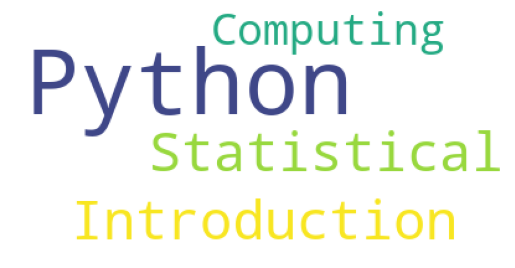

In [32]:
# Relative scaling of high-frequency words

text = "Introduction to Statistical Computing Python Python Python Python Python"
word_cloud = WordCloud(width = 400,
                       height = 200,
                       relative_scaling = 0.5, # or "auto"
                       background_color = "white").generate(text)
plt.imshow(word_cloud)
plt.axis("off")